In [2]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from time import time
#sp.show_version()

# praktiskt om man vill kunna se alla kolumner och rader i en dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 

2021-02-26 09:20:49,062 - SuPy - INFO - All cache cleared.


In [2]:
#sp.show_version()

In [3]:
#df_state_init, df_forcing = sp.load_SampleData()
#grid = df_state_init.index[0]

In [2]:
# Orginal Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
#path_runcontrol

# Sätt Path till runcontrol. Flera runcontrol kan användas om du t.ex. har olika forcing data.
#path_runcontrol = "/Users/juliacederbrant/Handledning_Julia/RunControl.nml"
path_runcontrol = "/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml"
path_runcontrol

'/Volumes/NO NAME/masterarbete/SuPy/input_data/RunControl.nml'

In [3]:
siteselect = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/SUEWS_SiteSelect.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 1,
        index_col=0,)

#siteselect

In [6]:
# Olika sätt att slica och filtrera

#siteselect.filter(like='z')
#siteselect[['Alt','Timezone','Fr_Paved']]
#siteselect.loc[1,'Alt'] # Behöver rad och kolumn

In [7]:
#siteselect.filter(like='Fr')

In [8]:
# T.ex SUEWS_NonVeg.txt

# https://suews.readthedocs.io/en/latest/input_files/SUEWS_SiteInfo/SUEWS_NonVeg.html

#non_veg = pd.read_csv("/Users/juliacederbrant/Handledning_Julia/Input/SUEWS_NonVeg.txt",        
        #delim_whitespace=True,
        #error_bad_lines=False,
        #header= 1,
        #index_col=0,)

#non_veg

In [4]:
# Ladda in inställningarna i runcontrol och SiteSelect i SuPy som en DataFrame
df_state_init = sp.init_supy(path_runcontrol)

#df_state_init.loc[1]

2021-02-25 17:20:06,712 - SuPy - INFO - All cache cleared.


In [5]:
# Grid df_state_init, se ovan. Fler Grids kan användas
grid = df_state_init.index[0] 


In [3]:
#forcing_2011 = pd.read_csv("/Users/juliacederbrant/Handledning_Julia/Input/Kc_2011_data_60.txt",        
        #delim_whitespace=True,
        #error_bad_lines=False,
        #header= 0,
        #index_col=0)

#forcing_2011

forcing_2017 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2017_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

forcing_2018 = pd.read_csv("/Volumes/NO NAME/masterarbete/SuPy/input_data/Input/Kb_2018_data_60.txt",        
        delim_whitespace=True,
        error_bad_lines=False,
        header= 0,
        index_col=0)

#forcing_2018

In [4]:
# sp.load_forcing_grid sätter Datetime som index på forcing data, samst läser in all forcing data!

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)

#sp.check för kolla så att forcing funkar
sp.check_forcing(df_forcing)
#df_forcing

2021-02-26 09:21:01,024 - SuPy - INFO - All cache cleared.
2021-02-26 09:21:06,492 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-02-26 09:21:16,160 - SuPy - INFO - All checks for `df_forcing` passed!


In [13]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html#SuPy

#
#s = '2017 08 04'
#e = '2017 08 30'

#var = 'rain'

#fig, ax =  sp.util.plot_day_clm(df_forcing.loc[s:e,[var]])
#ax.set_title((var + ': ' +  s + ' : ' + e), fontsize=20);

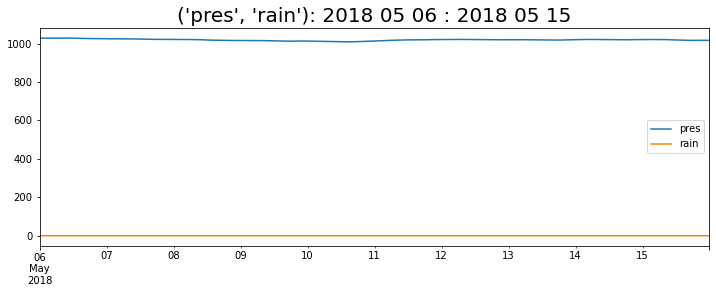

In [14]:
#matplotlib
s = '2018 05 06'
e = '2018 05 15'

var = 'pres', 'rain'

ax_output = df_forcing.loc[s:e,var].plot(figsize=(12,4))
ax_output.set_title((str(var) + ': ' +  s + ' : ' + e), fontsize=20);

In [8]:
df_state_init.loc[2]

var               ind_dim
ah_min            (0,)        15.00
                  (1,)        15.00
ah_slope_cooling  (0,)         2.70
                  (1,)         2.70
ah_slope_heating  (0,)         2.70
                              ...  
wuday_id          (8,)         0.00
dt_since_start    0            0.00
tstep_prev        0          300.00
tair_av           0          273.15
gridiv            0            2.00
Name: 2, Length: 927, dtype: float64

In [9]:
# changes lc in code but not in data

#Inceasing water by 0,24, taking from dectr and grass NAME: 500_311_001_089_049_000_050
df_state_init_500_311_001_089_049_00_05 = df_state_init.copy()
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(0,)')] = 0.500 # paved
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(1,)')] = 0.311 # building
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(2,)')] = 0.001 # evergreen tree
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(3,)')] = 0.089 # deciduous tree
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(4,)')] = 0.049 # grass
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_500_311_001_089_049_00_05.loc[:, ('sfr', '(6,)')] = 0.050 # water

#increasing grass 0.1, taking 0.1 from paved NAME 410_311_001_103_200_000_260
df_state_init_410_311_001_103_200_000_260 = df_state_init.copy()
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(0,)')] = 0.410 # paved
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(1,)')] = 0.311 # building
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(2,)')] = 0.001 # evergreen tree
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(3,)')] = 0.103 # deciduous tree
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(4,)')] = 0.149 # grass
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(5,)')] = 0.00 # bare soil
df_state_init_410_311_001_103_200_000_260.loc[:, ('sfr', '(6,)')] = 0.026 # water

# increasing bare soil by 0.1, taken from decTr NAME: 510_311_001_03_049_100_260
df_state_init_510_311_001_03_049_100_260 = df_state_init.copy()
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(0,)')] = 0.510 # paved
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(1,)')] = 0.311 # building
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(2,)')] = 0.001 # evergreen tree
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(3,)')] = 0.003 # deciduous tree
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(4,)')] = 0.049 # grass
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(5,)')] = 0.100 # bare soil
df_state_init_510_311_001_03_049_100_260.loc[:, ('sfr', '(6,)')] = 0.26 # water

#increasing evergreen tree by 0.1, taken from paved NAME: 410_311_101_103_049_000_260
df_state_init_410_311_101_103_049_000_260 = df_state_init.copy()
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(0,)')] = 0.410 # paved
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(1,)')] = 0.311 # building
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(2,)')] = 0.101 # evergreen tree
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(3,)')] = 0.103 # deciduous tree
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(4,)')] = 0.049 # grass
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(5,)')] = 0.0 # bare soil
df_state_init_410_311_101_103_049_000_260.loc[:, ('sfr', '(6,)')] = 0.26 # water




In [9]:

#kopiera över detta till en ny och testa runt imorgon, forsätt följa listan på to-do

df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)


2021-02-25 07:46:18,357 - SuPy - INFO - ====================
2021-02-25 07:46:18,398 - SuPy - INFO - Simulation period:
2021-02-25 07:46:18,420 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-02-25 07:46:18,426 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-02-25 07:46:18,431 - SuPy - INFO - 
2021-02-25 07:46:18,434 - SuPy - INFO - No. of grids: 2
2021-02-25 07:46:18,446 - SuPy - INFO - SuPy is running in parallel mode
2021-02-25 07:48:12,498 - SuPy - INFO - Execution time: 114.1 s
2021-02-25 07:48:12,511 - SuPy - INFO - ====================



In [10]:
#kod för att köra supy
df_output, df_state_final = sp.run_supy(df_forcing, df_state_init)

df_output_500_311_001_089_049_000_050, df_state_final_500_311_001_089_049_000_050 = sp.run_supy(df_forcing, df_state_init_500_311_001_089_049_000_050)

df_output_410_311_001_103_200_000_260, df_state_final_410_311_001_103_200_000_260 = sp.run_supy(df_forcing, df_state_init_410_311_001_103_200_000_260)

df_output_510_311_001_03_049_100_260, df_state_final_510_311_001_03_049_100_260= sp.run_supy(df_forcing, df_state_init_510_311_001_03_049_100_260)

df_output_410_311_101_103_049_000_260, df_state_final_410_311_101_103_049_000_260 = sp.run_supy(df_forcing, df_state_init_410_311_101_103_049_000_260)




2021-02-26 09:34:36,706 - SuPy - INFO - ====================
2021-02-26 09:34:36,744 - SuPy - INFO - Simulation period:
2021-02-26 09:34:36,757 - SuPy - INFO -   Start: 2016-12-31 23:05:00
2021-02-26 09:34:36,759 - SuPy - INFO -   End: 2018-12-31 23:00:00
2021-02-26 09:34:36,762 - SuPy - INFO - 
2021-02-26 09:34:36,773 - SuPy - INFO - No. of grids: 4
2021-02-26 09:34:36,779 - SuPy - INFO - SuPy is running in parallel mode
2021-02-26 09:38:23,172 - SuPy - INFO - Execution time: 226.4 s
2021-02-26 09:38:23,614 - SuPy - INFO - ====================



NameError: name 'df_state_init_500_311_001_089_049_000_050' is not defined

In [48]:
#KODEN NEDAN (8 celler) är för att kunna köra supy med olika albedo och LC och få den i samma datafram (df)
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html

#df_state_init.alb

In [49]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#df_state_init_test = df_state_init.copy()

In [50]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#df_state_init_test.sfr = 0
#df_state_init_test.loc[:, ('sfr', '(6,)')] = 1
#df_state_init_test.sfr

In [51]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
# create a `df_state_init_x` with different surface properties
#n_test = 48
#list_alb_test = np.linspace(0.1, 0.8, n_test).round(2)
#df_state_init_x = df_state_init_test.append(
    #[df_state_init_test]*(n_test-1), ignore_index=True)

# here we modify surface albedo
#df_state_init_x.loc[:, ('alb', '(1,)')] = list_alb_test
#df_state_init_x.index=df_state_init_x.index.rename('grid')

In [52]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#df_res_alb_test,df_state_final_x = sp.run_supy(df_forcing, df_state_init_x)

In [53]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
# choose results of July 2017 for analysis
#df_res_alb_test_july = df_res_alb_test.SUEWS.unstack(0).loc["2017 7"]
#df_res_alb_T2_stat = df_res_alb_test_july.T2.describe()
#df_res_alb_T2_diff = df_res_alb_T2_stat.transform(
    #lambda x: x - df_res_alb_T2_stat.iloc[:, 0]
#)
#df_res_alb_T2_diff.columns = list_alb_test - list_alb_test[0]

In [54]:
#från tutorial https://supy.readthedocs.io/en/latest/tutorial/impact-studies.html
#ax_temp_diff = df_res_alb_T2_diff.loc[["max", "mean", "min"]].T.plot()
#_ = ax_temp_diff.set_ylabel("$\Delta T_2$ ($^{\circ}}$C)")
#_ = ax_temp_diff.set_xlabel(r"$\Delta\alpha$")
#ax_temp_diff.margins(x=0.2, y=0.2)

In [10]:
df_output.columns.levels[0]

Index(['BEERS', 'DailyState', 'RSL', 'SUEWS', 'debug', 'snow'], dtype='object', name='group')

In [11]:
df_output.head()

0.778217  42.983663  45.189108  47.394554  49.6  1.844681  1.916009  1.990095  2.067046  2.146973  2.229990  2.316217  2.405778  2.498802  2.595423  2.695780  2.800017  2.908286  3.020740  3.137543  3.319340  3.483758  3.634432  3.773930  3.904134  4.026465  4.142024  4.251682  4.356140  4.455971  4.551651  4.643578  4.732092  4.817483  4.9  7.894043  7.894197  7.894353  7.894508  7.894664  7.894820  7.894976  7.895133  7.895289  7.895447  7.895604  7.895762  7.895920  7.896078  7.896237  7.896544  7.896839  7.897123  7.897399  7.897666  7.897925  7.898178  7.898424  7.898665  7.898899  7.899129  7.899354  7.899574  7.899789  7.9  6.305345  6.305192  6.305040  6.304886  6.304733  6.304579  6.304425  6.304271  6.304117  6.303962  6.303807  6.303651  6.303495  6.303339  6.303183  6.302881  6.302590  6.302310  6.302039  6.301776  6.301520  6.301271  6.301028  6.300792  6.300560  6.300334  6.300113  6.299896  6.299684  6.299476   5216.619913  16.518313   

group                                                                                                                                                   SUEWS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            debug                                                                     \
var                               Lc     beta    zd_RSL    z0_RSL        elm       Scc         f UStar_RSL UStar_heat TStar_RSL     FAI    PAI flag_RSL Kdown  Kup       Ldown         Lup Tsurf         QN         QF        QS        QH        QE   QHlumps   QElumps       QHresis      Rain  Irr      Evap        RO     TotCh    SurfCh       State NWtrState  Drainage        SMD FlowCh AddWater ROSoil    ROPipe ROImp ROVeg ROWater WUInt WUEveTr WUDecTr WUGrass   SMDPaved   SMDBldgs   SMDEveTr   SMDDecTr  SMDGrass SMDBSoil   StPaved   StBldgs   StEveTr   StDecTr   StGrass StBSoil       StWater      Zenith     Azimuth AlbBulk      Fcld     LAI    z0m     zdm     UStar           Lob         RA           RS   Fc FcPhoto FcRespi FcMetab FcTraff FcBuild FcPoint   QNSnowFr QNSnow AlbSnow   QM QMFreeze QMRain  SWE MeltWater MeltWStore SnowCh SnowRPaved SnowRBldgs        Ts        T2        Q2       U10        RH2    RSS_Paved      RSS_Bldgs    RSS_EveTr    RSS_DecTr    RSS_Grass    RSS_BSoil   
grid datetime                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1    2016-12-31 23:05:00  103.239458  0.37

In [21]:
df_output_suews_base = df_output.loc[1].SUEWS
df_output_suews_a = df_output.loc[2].SUEWS

df_output_merge_x=pd.concat([df_output_suews_base, df_output_suews_a,],axis=1,join='inner',keys=['base','a']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)


In [16]:
df_output_suews.loc[:, ['QN', 'QS', 'QH', 'QE', 'QF']].describe()

var               QN             QS             QH             QE             QF
count  210240.000000  210240.000000  210240.000000  210240.000000  210240.000000
mean       54.565263      24.016540      49.833260      14.674158      33.958696
std       152.889330      94.110061      58.806341      22.397869      13.953908
min       -91.422737    -105.941487     -50.850314      -0.873647      10.748587
25%       -35.481917     -29.612226      10.368018       1.902297      21.315249
50%       -19.930395     -10.318156      34.724667       5.812442      35.487220
75%        78.126496      38.671679      65.357609      16.651180      44.382371
max       644.576656     447.839012     306.524778     208.783102      76.468386

In [16]:

df_output_suews.loc[:, ['QN', 'QS', 'QH', 'QE', 'QF']].describe()

NameError: name 'df_output_suews' is not defined

In [16]:
# code for better names on variables
dict_var_disp = {
    'QN': '$Q^*$',
    'QS': r'$\Delta Q_S$',
    'QE': '$Q_E$',
    'QH': '$Q_H$',
    'QF': '$Q_F$',
    'Kdown': r'$K_{\downarrow}$',
    'Kup': r'$K_{\uparrow}$',
    'Ldown': r'$L_{\downarrow}$',
    'Lup': r'$L_{\uparrow}$',
    'Rain': '$P$',
    'Irr': '$I$',
    'Evap': '$E$',
    'RO': '$R$',
    'TotCh': '$\Delta S$',
}

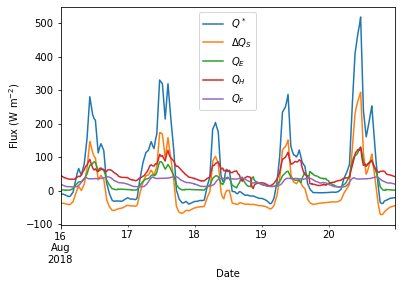

In [18]:
#testar för ändrat lc  # ev ta bort grid
#plot all Qs
ax_output = df_output_suews\
    .loc[grid]\
    .loc['2018 08 16':'2018 08 020',
         ['QN', 'QS', 'QE', 'QH', 'QF']]\
    .rename(columns=dict_var_disp)\
    .plot()
_ = ax_output.set_xlabel('Date')
_ = ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
_ = ax_output.legend()

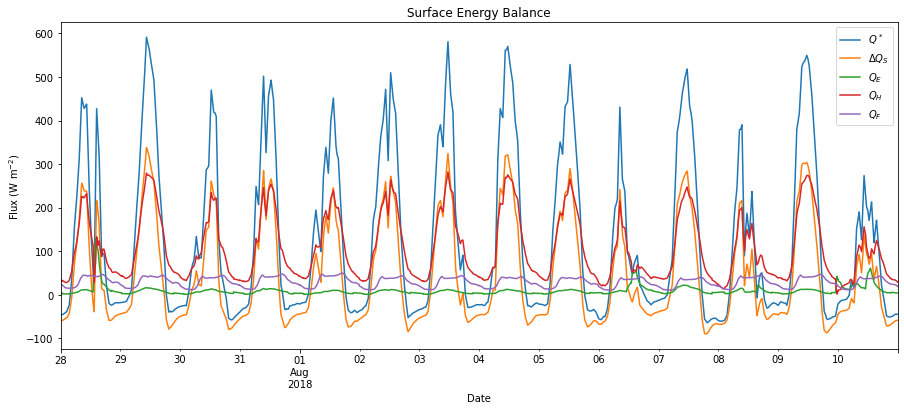

In [79]:
# energy balance
s = '2018 07 28'
e = '2018 08 10'
#var = ["QN", "QS", "QE", "QH", "QF"]


ax_output = (
    df_output_suews.loc[grid]
    .loc[s:e, ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(15, 6), title="Surface Energy Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()
#ax_output.set_ylim([0,100])

In [22]:
rsmp_1d = df_output_suews.loc[grid].resample("1d")
# daily mean values
df_1d_mean = rsmp_1d.mean()
# daily sum values
df_1d_sum = rsmp_1d.sum()

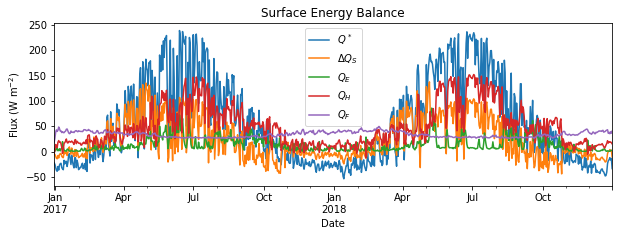

In [19]:
# energy balance
ax_output = (
    df_1d_mean.loc[:, ["QN", "QS", "QE", "QH", "QF"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Surface Energy Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()


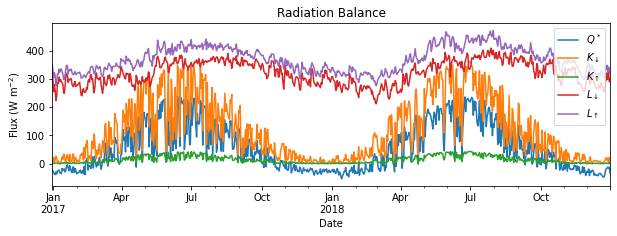

In [20]:
# radiation balance        : betyder allt
ax_output = (
    df_1d_mean.loc[:, ["QN", "Kdown", "Kup", "Ldown", "Lup"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Radiation Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
_ = ax_output.legend()

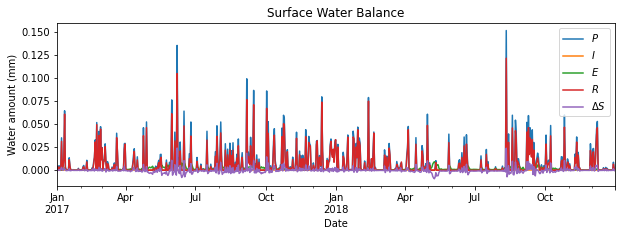

In [21]:
# water balance
s = '2017'
e = '2018'

ax_output = (
    df_1d_mean.loc[s:e, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Surface Water Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Water amount (mm)")
_ = ax_output.legend()

In [66]:
#testar vad den gör

df_1d_mean.loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]

var             Rain  Irr      Evap        RO     TotCh
datetime                                               
2016-12-31  0.083333  0.0 -0.004548  0.169935  0.014210
2017-01-01  0.003762  0.0  0.000173  0.003260  0.000483
2017-01-02  0.000000  0.0  0.000051  0.000000 -0.000051
2017-01-03  0.004514  0.0  0.000426  0.002969  0.001119
2017-01-04  0.004861  0.0  0.000876  0.000002 -0.000064
...              ...  ...       ...       ...       ...
2018-12-27  0.000000  0.0  0.000040  0.000000 -0.000040
2018-12-28  0.000000  0.0  0.000037  0.000000 -0.000037
2018-12-29  0.008681  0.0  0.000230  0.007536  0.000915
2018-12-30  0.001736  0.0  0.000139  0.001851 -0.000255
2018-12-31  0.000000  0.0  0.000043  0.000000 -0.000043

[731 rows x 5 columns]

In [18]:
df_output_merge_x=pd.concat([df_output, df_output_imperv, df_output_increasegreen,df_output_halftreesgrass, df_output_impervwater, df_output_greenerynowater, df_output_greeneryandwater, df_output_treesandwater, df_output_grassandwater],axis=1,join='inner',keys=['kville','imperv','increasegreen', 'halftreesgrass', 'impervwater', 'greenerynowater', 'greeneryandwater', 'treesandwater', 'grassandwater']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]

df_merge_x=df_output_merge_x.SUEWS

NameError: name 'df_output' is not defined

In [17]:
df_merge_x['QH'].plot()

NameError: name 'df_merge_x' is not defined

In [32]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    color1 = ('b', 'g', 'r', 'c', 'm')
    color2 = ('g', 'r', 'c', 'm')

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var, colors=color1)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['1','2','3', '4', '5'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'2')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'3')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'4')]-df_in.loc[s:e,(var,'1')],\
        df_in.loc[s:e,(var,'5')]-df_in.loc[s:e,(var,'1')],\
        ],\
        axis=1,join='inner',keys=['1','2','3', '4', '5']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '),colors=color2)

    b.legend(['2','3', '4', '5'])


In [11]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['kville','imperv','increasegreen', 'halftreesgrass', 'impervwater', 'greenerynowater', 'greeneryandwater', 'treesandwater', 'grassandwater'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'imperv')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'increasegreen')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'halftreesgrass')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'impervwater')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'greenerynowater')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'greeneryandwater')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'treesandwater')]-df_in.loc[s:e,(var,'kville')],\
        df_in.loc[s:e,(var,'grassandwater')]-df_in.loc[s:e,(var,'kville')],\
        ],\
        axis=1,join='inner',keys=['kville', 'imperv','increasegreen', 'halftreesgrass', 'impervwater', 'greenerynowater', 'greeneryandwater', 'treesandwater', 'grassandwater']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '))

    b.legend(['imperv','increasegreen', 'halftreesgrass', 'impervwater', 'greenerynowater', 'greeneryandwater', 'treesandwater', 'grassandwater'])

In [13]:
from datetime import date,datetime

def supy_plot(var, df_in, s,e, size=False):

    if size:   
        size=size
    else:
        size = 10, 6

    fig, axes = plt.subplots(2, 1, sharex=True)
    a = df_in.loc[s:e,[var]]\
        .plot(ax=axes[0],figsize=(size),title=var)

    #f_date = (date(int(s[0:4]),int(s[5:7]),int(s[7:10])))
    #l_date = (date(int(e[0:4]),int(e[5:7]),int(e[7:10])))
    #f_date - datetime.timedelta(days=2)    
    #l_date + datetime.timedelta(days=2)
    
    #plt.hlines(0,f_date - datetime.timedelta(days=2),l_date + datetime.timedelta(days=2),\
        #linestyles='--',colors='grey')
        # byt till dina variabelnamn
    a.legend(['base','a'])

    b = df_diff_m=pd.concat([df_in.loc[s:e,(var,'a')]-df_in.loc[s:e,(var,'base')],\
        ],\
        axis=1,join='inner',keys=['base', 'a']).sort_index(axis=1).\
        plot(ax=axes[1], figsize=(size), title = ('Difference '))

    b.legend(['a'])

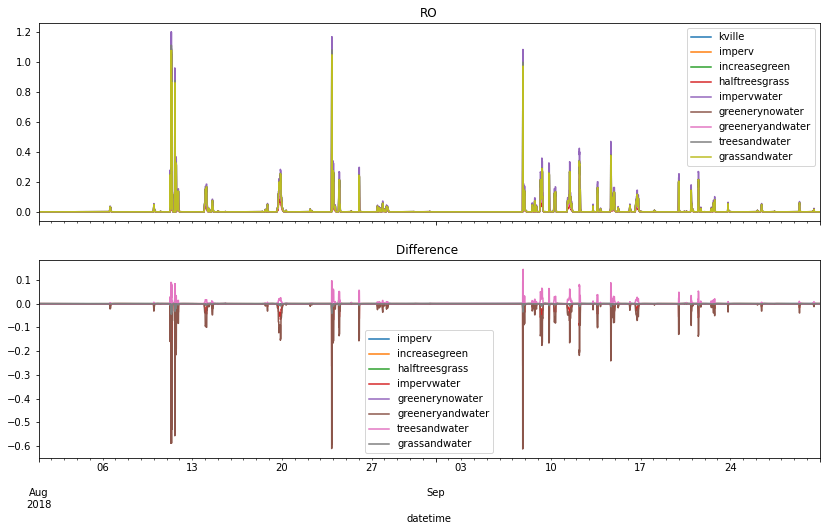

In [81]:
s = '2018 08'
e = '2018 09'

supy_plot('RO', df_merge_x, s,e, size=(14,8))

In [17]:
s = '2018 10 06'
e = '2018 10 07'

supy_plot('QH', df_output_merge_x, s,e, size=(14,8))

KeyError: "['QH'] not in index"

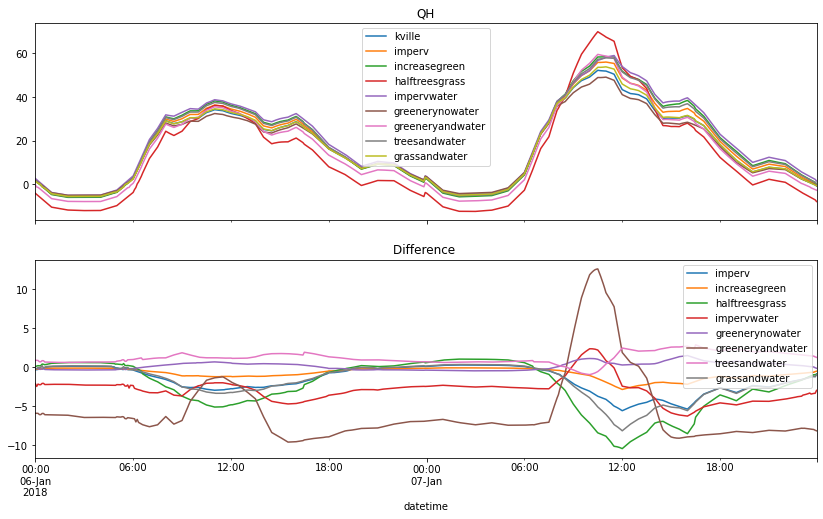

In [47]:
s = '2018 01 06'
e = '2018 01 07'

supy_plot('QH', df_merge_x, s,e, size=(14,8))

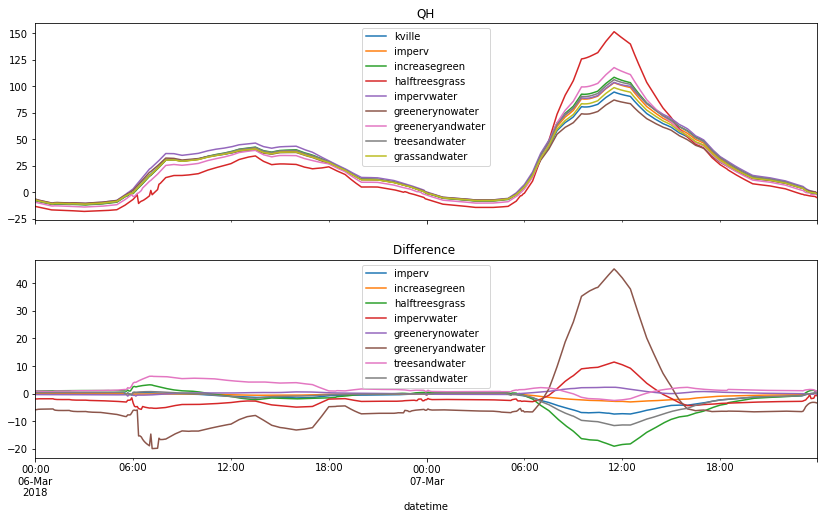

In [48]:
s = '2018 03 06'
e = '2018 03 07'

supy_plot('QH', df_merge_x, s,e, size=(14,8))

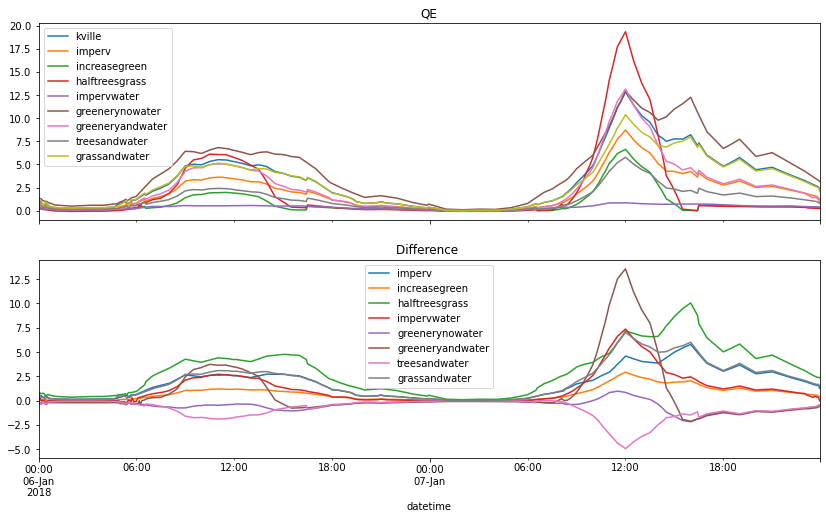

In [49]:
s = '2018 01 06'
e = '2018 01 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

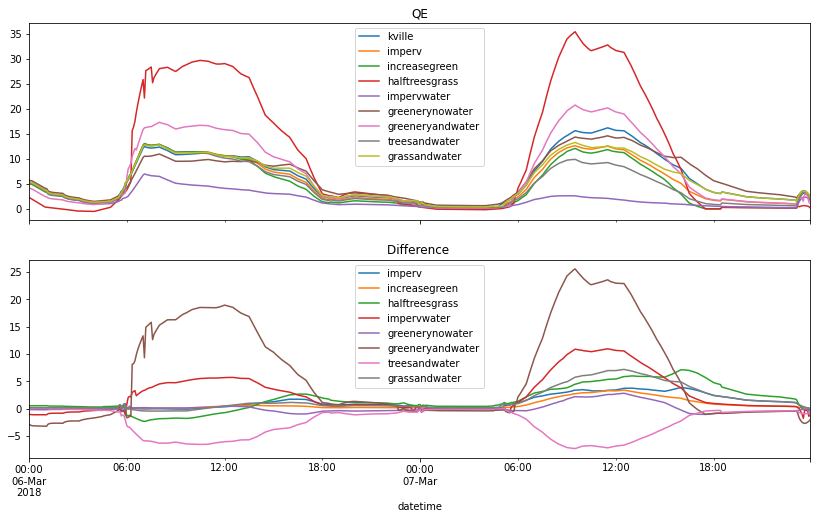

In [50]:
s = '2018 03 06'
e = '2018 03 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

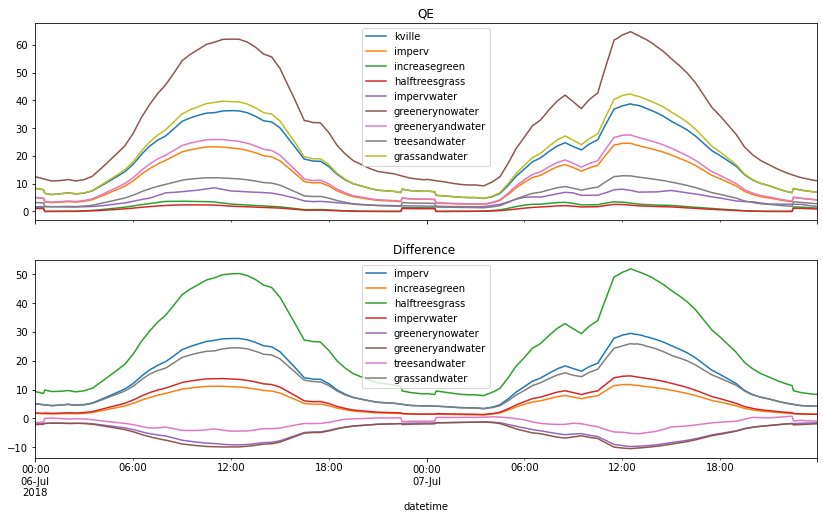

In [51]:
s = '2018 07 06'
e = '2018 07 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

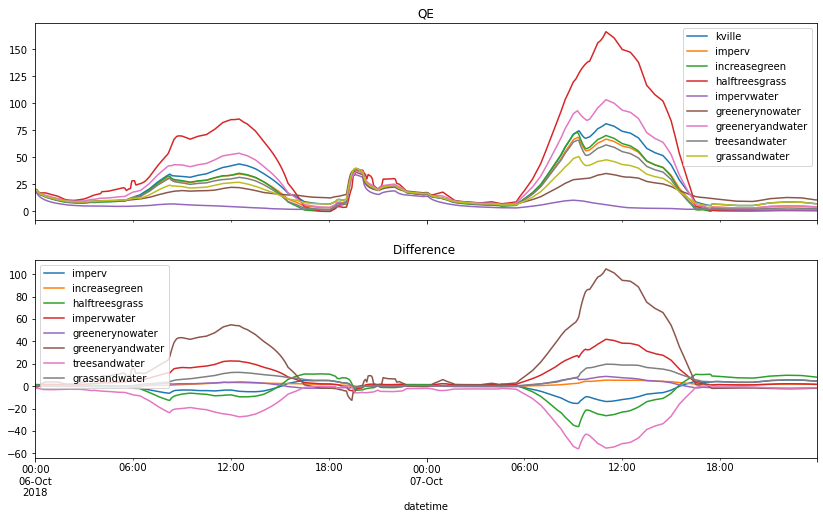

In [52]:
s = '2018 10 06'
e = '2018 10 07'

supy_plot('QE', df_merge_x, s,e, size=(14,8))

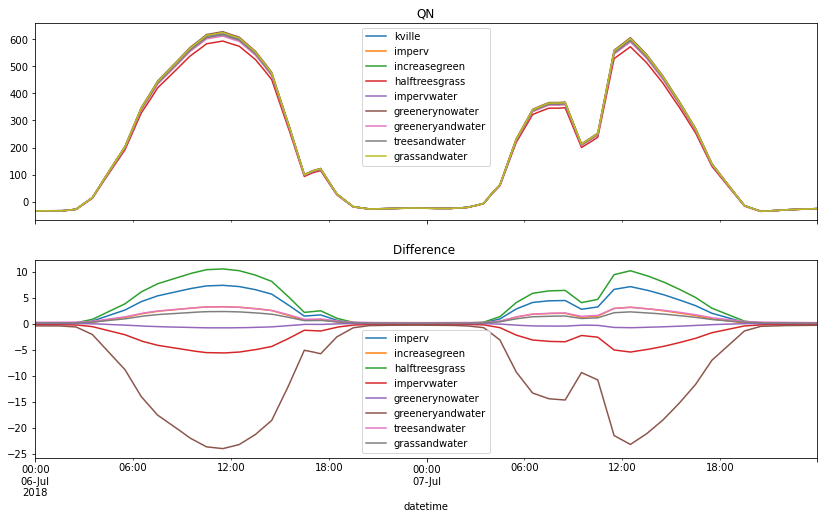

In [53]:
s = '2018 07 06'
e = '2018 07 07'

supy_plot("QN", df_merge_x, s,e, size=(14,8))

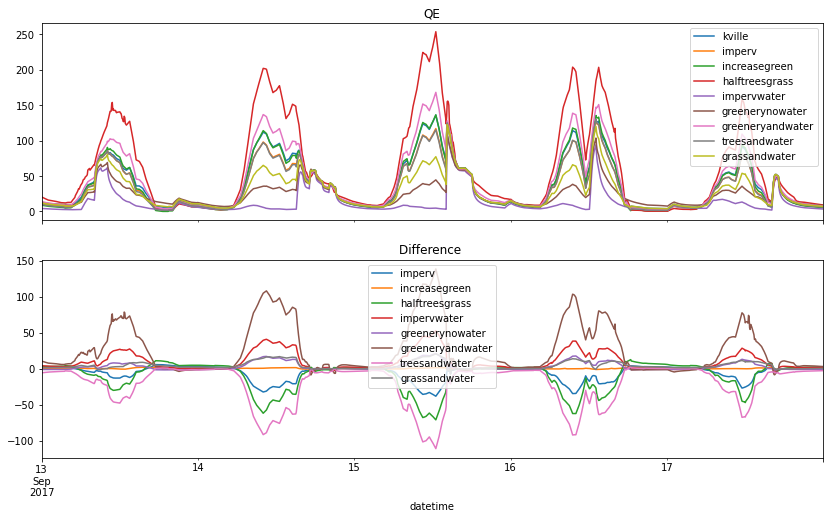

In [54]:
#kraftigt regn
s = '2017 09 13'
e = '2017 09 17'

supy_plot("QE", df_merge_x, s,e, size=(14,8))

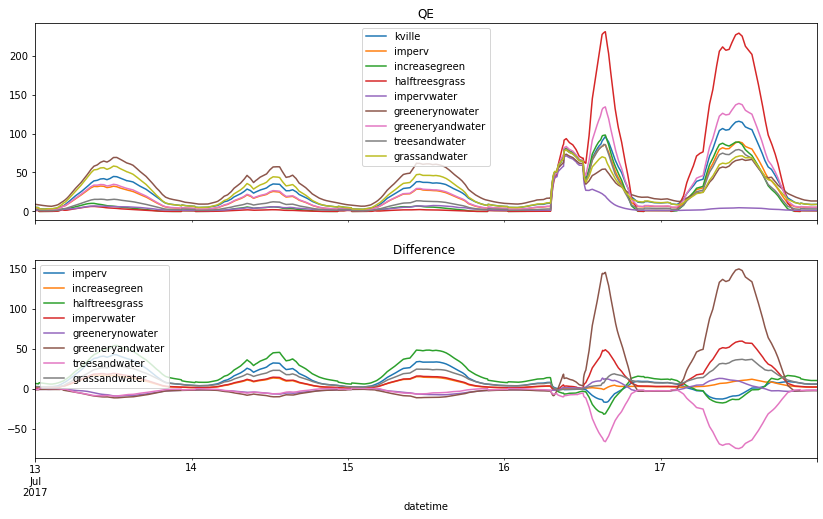

In [55]:
#varmt sedan regn morgonen 16/7
s = '2017 07 13'
e = '2017 07 17'

supy_plot("QE", df_merge_x, s,e, size=(14,8))

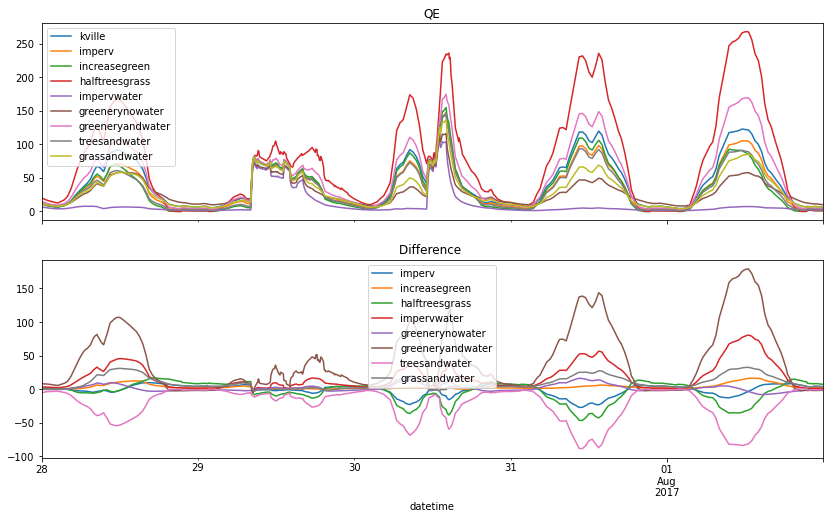

In [56]:
#varmt sedan regn morgonen 30/7
s = '2017 07 28'
e = '2017 08 01'

supy_plot("QE", df_merge_x, s,e, size=(14,8))

In [82]:
def daily_energy(scenario, s,e):
    ax_output = (
        scenario.loc[1].loc[s:e].SUEWS.resample("1d").mean().loc[:, ["QN", "QS", "QE", "QH", "QF"]]
        .rename(columns=dict_var_disp)
        .plot(figsize=(10, 3), title="Surface Energy Balance",)
    )
    _ = ax_output.set_xlabel("Date")
    _ = ax_output.set_ylabel("Flux ($ \mathrm{W \ m^{-2}}$)")
    _ = ax_output.legend()

def daily_water(scenario, s,e):
    ax_output = (
        scenario.loc[1].loc[s:e].SUEWS.resample("1d").mean().loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
    .rename(columns=dict_var_disp)
    .plot(figsize=(10, 3), title="Surface Water Balance",)
)
_ = ax_output.set_xlabel("Date")
_ = ax_output.set_ylabel("Water amount (mm)")
_ = ax_output.legend()


def month_resampler(scenario, s,e):
    df_plot = scenario.loc[1].SUEWS.loc[s:e].copy()
    df_plot.index = df_plot.index.set_names("Month")
    rsmp_1M = df_plot.shift(-1).dropna(how="all").resample("1M", kind="period")
    # mean values
    df_1M_mean = rsmp_1M.mean()
    # sum values
    df_1M_sum = rsmp_1M.sum()

    # month names
    name_mon = [x.strftime("%b") for x in rsmp_1M.groups]
    # create subplots showing two panels together
    fig, axes = plt.subplots(2, 1, sharex=True)
    # surface energy balance
    _ = (
        df_1M_mean.loc[:, ["QN", "QS", "QE", "QH", "QF"]]
        .rename(columns=dict_var_disp)
        .plot(
            ax=axes[0],  # specify the axis for plotting
            figsize=(10, 6),  # specify figure size
            title="Surface Energy Balance",
            kind="bar",
        )
    )
    # surface water balance
    _ = (
        df_1M_sum.loc[:, ["Rain", "Irr", "Evap", "RO", "TotCh"]]
        .rename(columns=dict_var_disp)
        .plot(
            ax=axes[1],  # specify the axis for plotting
            title="Surface Water Balance",
            kind="bar",
        )
    )

    # annotations
    _ = axes[0].set_ylabel("Mean Flux ($ \mathrm{W \ m^{-2}}$)")
    _ = axes[0].legend()
    _ = axes[1].set_xlabel("Month")
    _ = axes[1].set_ylabel("Total Water Amount (mm)")
    _ = axes[1].xaxis.set_ticklabels(name_mon, rotation=0)
    _ = axes[1].legend()

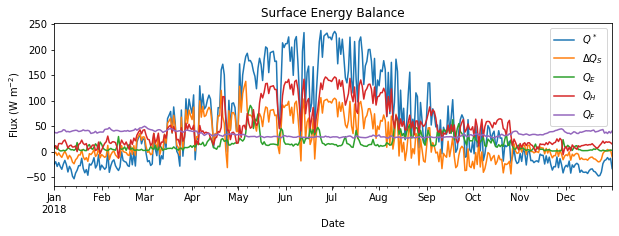

In [83]:
daily_energy(df_output_greeneryandwater, '2018','2018')

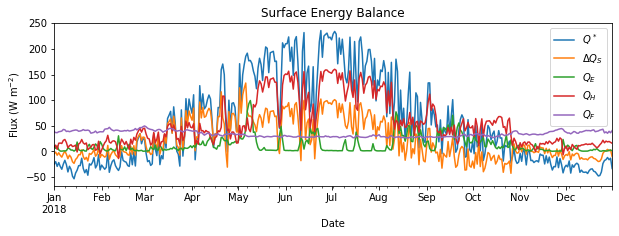

In [27]:
daily_energy(df_output_greenerynowater, '2018')

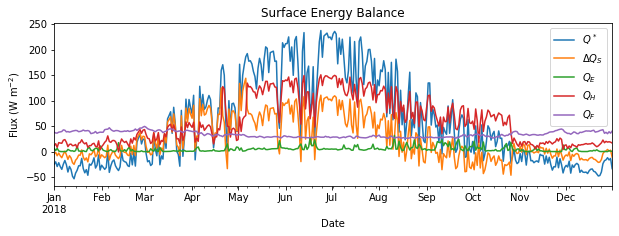

In [36]:
daily_energy(df_output_imperv, '2018')

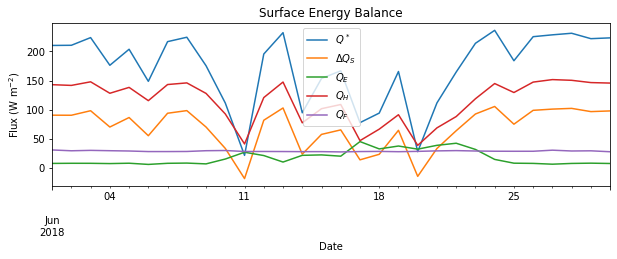

In [76]:
daily_energy(df_output, '2018 06')

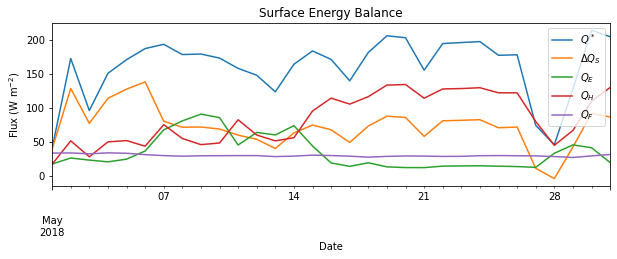

In [57]:
daily_energy(df_output_greeneryandwater, '2018 05')

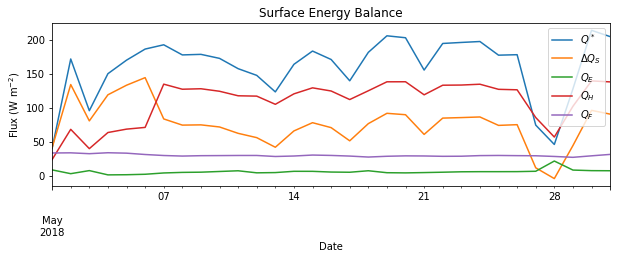

In [58]:
daily_energy(df_output_imperv, '2018 05')

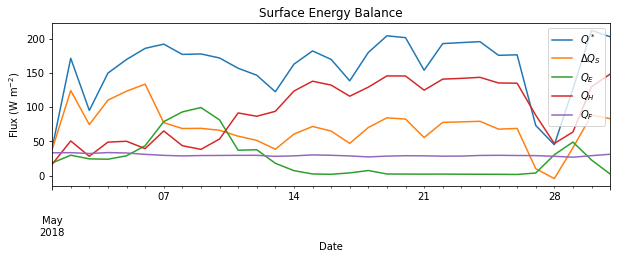

In [59]:
daily_energy(df_output_greenerynowater, '2018 05')

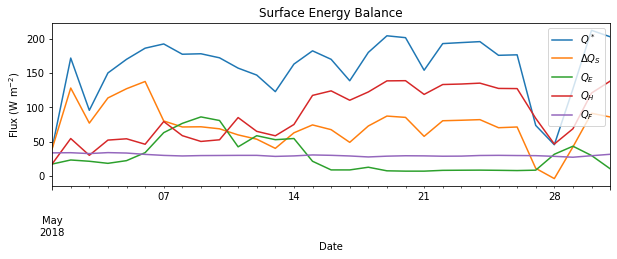

In [60]:
daily_energy(df_output, '2018 05')

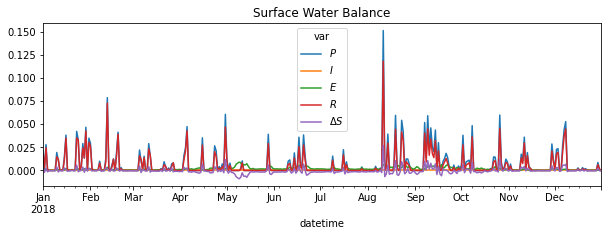

In [29]:
daily_water(df_output_greeneryandwater, '2018')

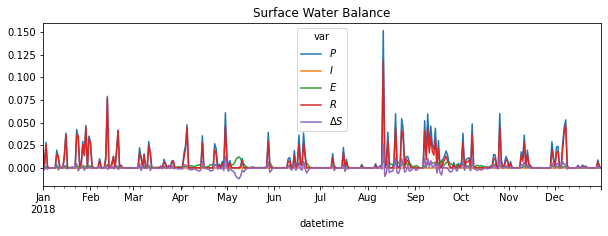

In [31]:
daily_water(df_output_greenerynowater, '2018')

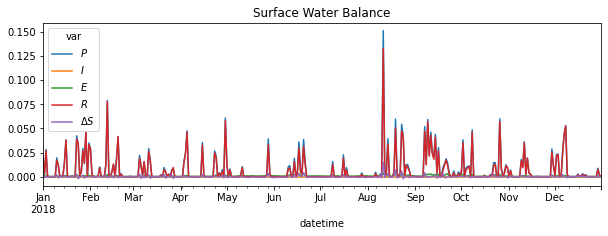

In [40]:
daily_water(df_output_imperv, '2018')

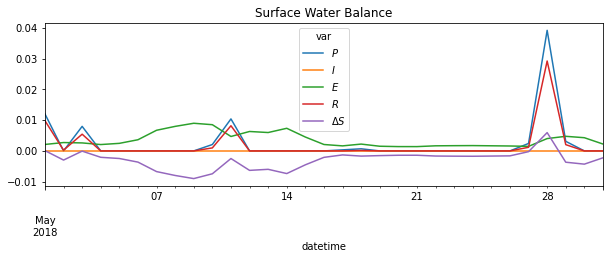

In [41]:
daily_water(df_output_greeneryandwater, '2018 05')

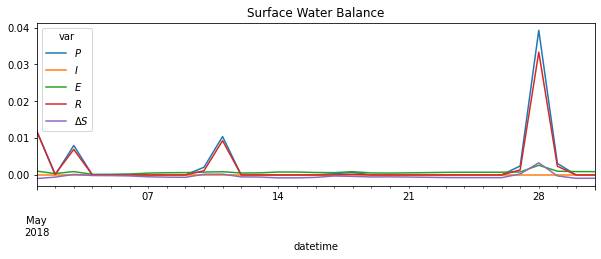

In [42]:
daily_water(df_output_imperv, '2018 05')

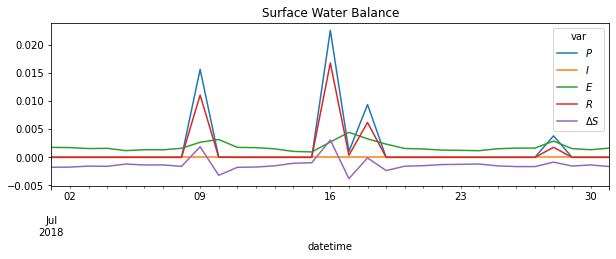

In [32]:
daily_water(df_output_greeneryandwater, '2018 07')

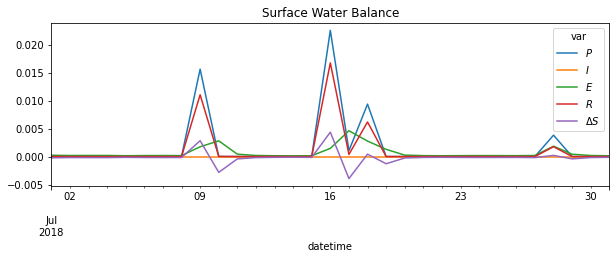

In [33]:
daily_water(df_output_greenerynowater, '2018 07')

In [14]:
#
#sp.save_supy(df_output, df_state_final, path_runcontrol=path_runcontrol)

[PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2016_DailyState.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_DailyState.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2018_DailyState.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_BEERS_5.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_BEERS_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2018_BEERS_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_RSL_5.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_RSL_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2018_RSL_60.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_SUEWS_5.txt'),
 PosixPath('/Volumes/NO NAME/masterarbete/SuPy/input_data/Output/Kb1_2017_SUEWS_60.txt'),
 PosixPath('/